In [3]:
import pandas as dp
import matplotlib.pyplot as plt

In [4]:
df = dp.read_csv('C:/Users/DELL/Desktop/online retail analysis/Retail.csv')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [5]:
#check for missing values
print(df.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


Remove rows with negative quantities or UnitPrices

In [6]:
df=df[(df['Quantity']>0)& (df['UnitPrice']>0)]

Convert 'InvoiceDate' to datetime

In [7]:
df['InvoiceDate']=dp.to_datetime(df['InvoiceDate'])
print(df.dtypes)

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object


C:\Users\DELL\AppData\Local\Temp\ipykernel_13860\966565131.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceDate']=dp.to_datetime(df['InvoiceDate'])


Sales Analysis
--Total sales
--Top selling Products
--Revenue Generation

In [8]:
# Add a "Sales"Column(Quatntity * UnitPrice)
df['Sales']=df['Quantity']*df['UnitPrice']
df

C:\Users\DELL\AppData\Local\Temp\ipykernel_13860\1308640799.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sales']=df['Quantity']*df['UnitPrice']


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [9]:
total_sales = df['Sales'].sum()
print(f'total sales:{total_sales:.2f}')

total sales:10666684.54


In [10]:
# Top selling Products by Quantity
Top_products = df.groupby('Description') ['Quantity'].sum().sort_values(ascending=False).head(10)
print(Top_products)

Description
PAPER CRAFT , LITTLE BIRDIE           80995
MEDIUM CERAMIC TOP STORAGE JAR        78033
WORLD WAR 2 GLIDERS ASSTD DESIGNS     55047
JUMBO BAG RED RETROSPOT               48474
WHITE HANGING HEART T-LIGHT HOLDER    37891
POPCORN HOLDER                        36761
ASSORTED COLOUR BIRD ORNAMENT         36461
PACK OF 72 RETROSPOT CAKE CASES       36419
RABBIT NIGHT LIGHT                    30788
MINI PAINT SET VINTAGE                26633
Name: Quantity, dtype: int64


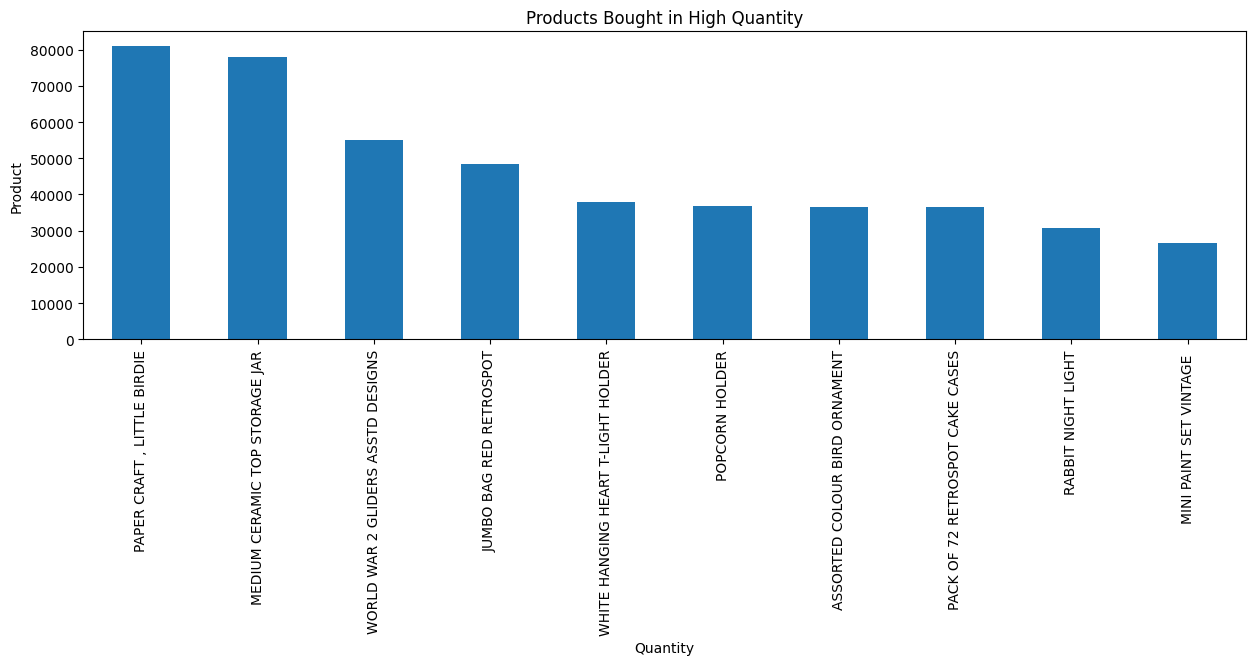

In [11]:
Top_products.plot(kind='bar',figsize=(15,4))
plt.title('Products Bought in High Quantity')
plt.xlabel('Quantity')
plt.ylabel('Product')
plt.show()

In [12]:
#Top selling Products by sales
Top_products_Revenue = df.groupby('Description') ['Sales'].sum().sort_values(ascending=False).head(10)
print(Top_products_Revenue)

Description
DOTCOM POSTAGE                        206248.77
REGENCY CAKESTAND 3 TIER              174484.74
PAPER CRAFT , LITTLE BIRDIE           168469.60
WHITE HANGING HEART T-LIGHT HOLDER    106292.77
PARTY BUNTING                          99504.33
JUMBO BAG RED RETROSPOT                94340.05
MEDIUM CERAMIC TOP STORAGE JAR         81700.92
Manual                                 78112.82
POSTAGE                                78101.88
RABBIT NIGHT LIGHT                     66964.99
Name: Sales, dtype: float64


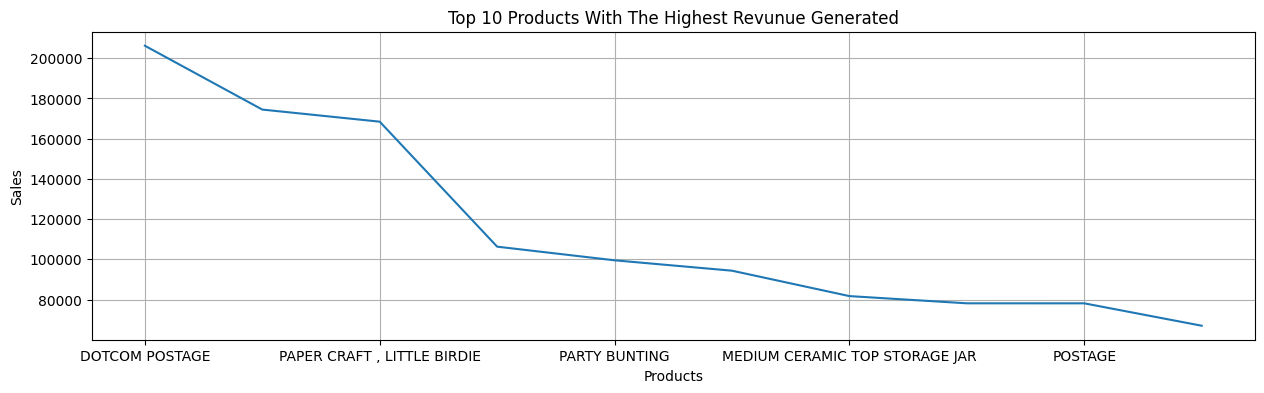

In [13]:
Top_products_Revenue.plot(kind='line',figsize=(15,4))
plt.title('Top 10 Products With The Highest Revunue Generated')
plt.xlabel('Products')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

Customer Analysis
--Customer Segmentation
--Customer Lifetime Value (CLV)....How much thet spend over time

In [14]:
#Total spend by Customer
customer_sales= df.groupby("CustomerID")['Sales'].sum().sort_values(ascending=False).head(10)
customer_sales

CustomerID
14646.0    280206.02
18102.0    259657.30
17450.0    194550.79
16446.0    168472.50
14911.0    143825.06
12415.0    124914.53
14156.0    117379.63
17511.0     91062.38
16029.0     81024.84
12346.0     77183.60
Name: Sales, dtype: float64

In [15]:
# Frequency purchases by customers
customer_frquency =df.groupby('CustomerID').size().sort_values(ascending=False)
customer_frquency

CustomerID
17841.0    7847
14911.0    5675
14096.0    5111
12748.0    4595
14606.0    2700
           ... 
17846.0       1
13017.0       1
13099.0       1
13106.0       1
12346.0       1
Length: 4338, dtype: int64

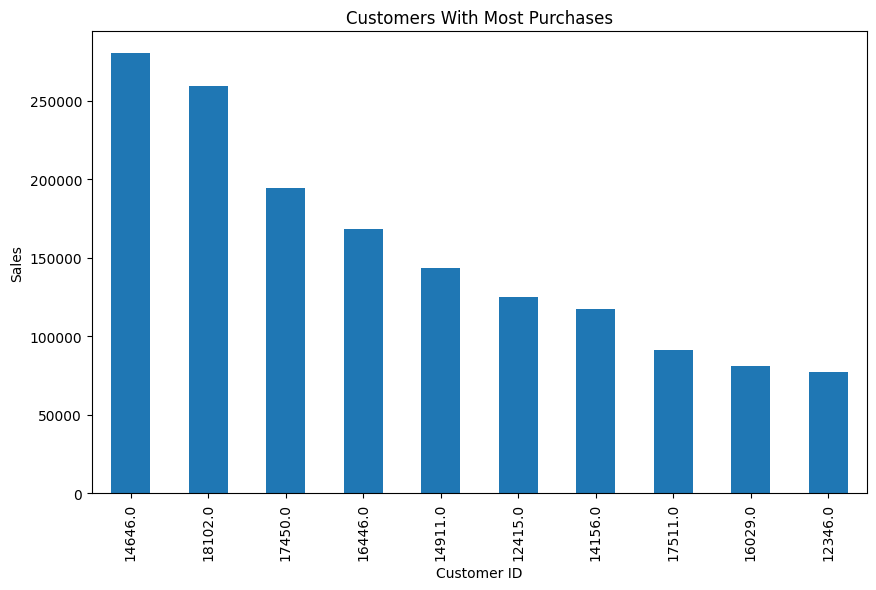

In [16]:
customer_sales.plot(kind='bar',figsize=(10,6))
plt.title('Customers With Most Purchases')
plt.xlabel('Customer ID')
plt.ylabel('Sales')
plt.show()

Geographical Analysis

In [17]:
# Sales by Region(Country)
sales_by_region= df.groupby('Country')['Sales'].sum().sort_values(ascending=False)
print(sales_by_region)

Country
United Kingdom          9025222.084
Netherlands              285446.340
EIRE                     283453.960
Germany                  228867.140
France                   209715.110
Australia                138521.310
Spain                     61577.110
Switzerland               57089.900
Belgium                   41196.340
Sweden                    38378.330
Japan                     37416.370
Norway                    36165.440
Portugal                  33747.100
Finland                   22546.080
Singapore                 21279.290
Channel Islands           20450.440
Denmark                   18955.340
Italy                     17483.240
Hong Kong                 15691.800
Cyprus                    13590.380
Austria                   10198.680
Israel                     8135.260
Poland                     7334.650
Greece                     4760.520
Unspecified                4749.790
Iceland                    4310.000
Canada                     3666.380
USA                 

In [18]:
# Top product categories bt region
top_product_by_region=df.groupby(['Country','Description']) ['Sales'].sum().unstack().fillna(0)
print(top_product_by_region.head())

Description   4 PURPLE FLOCK DINNER CANDLES   50'S CHRISTMAS GIFT BAG LARGE  \
Country                                                                       
Australia                               0.0                             0.0   
Austria                                 0.0                             0.0   
Bahrain                                 0.0                             0.0   
Belgium                                 0.0                             0.0   
Brazil                                  0.0                             0.0   

Description   DOLLY GIRL BEAKER   I LOVE LONDON MINI BACKPACK  \
Country                                                         
Australia                 216.0                          16.6   
Austria                    15.0                           0.0   
Bahrain                     0.0                           0.0   
Belgium                    75.0                          16.6   
Brazil                      0.0                         

Time series Analysis
sales over time
identify peak sales periods

In [19]:
#Resample the data to monthly frequency and sum of the sales

monthly_sales=df.resample('M',on='InvoiceDate')['Sales'].sum()
monthly_sales

InvoiceDate
2010-12-31     823746.140
2011-01-31     691364.560
2011-02-28     523631.890
2011-03-31     717639.360
2011-04-30     537808.621
2011-05-31     770536.020
2011-06-30     761739.900
2011-07-31     719221.191
2011-08-31     759138.380
2011-09-30    1058590.172
2011-10-31    1154979.300
2011-11-30    1509496.330
2011-12-31     638792.680
Freq: M, Name: Sales, dtype: float64

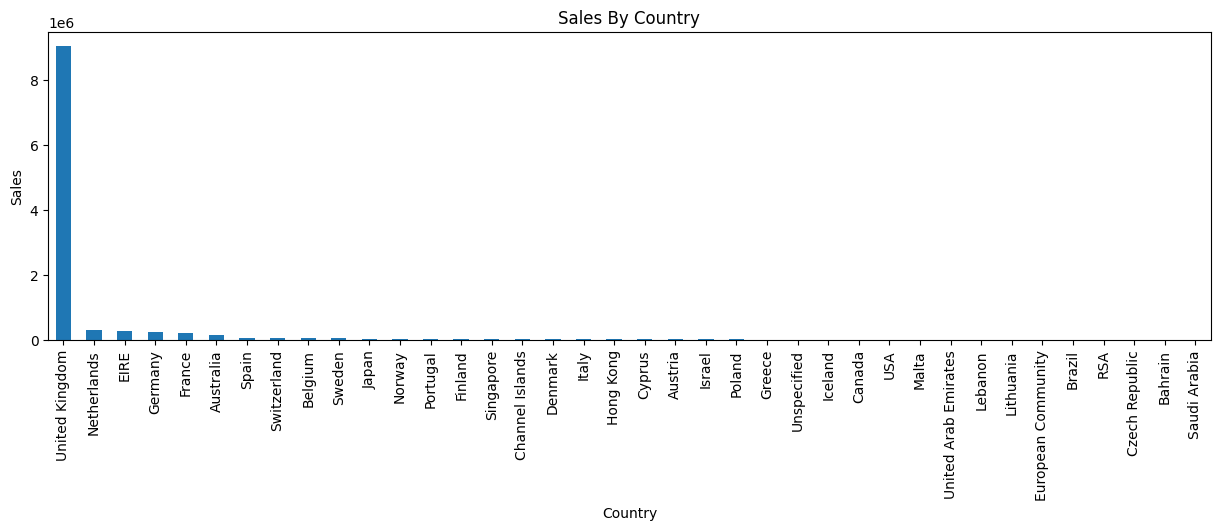

In [29]:
sales_by_region.plot(kind='bar',figsize=(15,4))
plt.title('Sales By Country')
plt.xlabel('Country')
plt.ylabel('Sales')

plt.show()

In [ ]:
df['MonthYear']=df['InvoiceDate'].dt.to_period("M")

monthly_sales=df.groupby('MonthYear')['Sales'].sum()

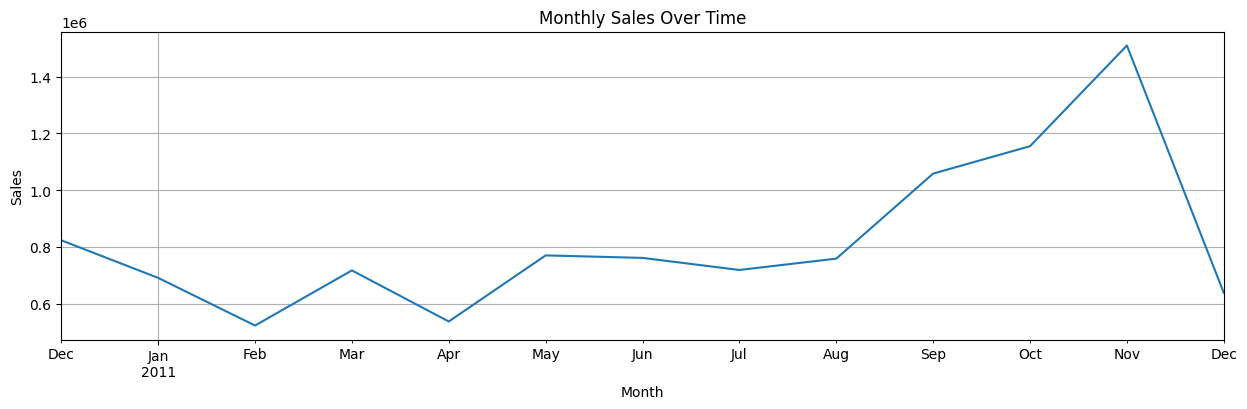

In [22]:
monthly_sales.plot(kind='line', figsize=(15,4))
plt.title('Monthly Sales Over Time')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

In [23]:
df['MonthTime']=df['InvoiceDate'].dt.to_period("Y")
Top_products_by_time = df.groupby(['MonthTime','Description'])['Sales'].sum().sort_values(ascending=True).head(30)
Top_products_by_time

C:\Users\DELL\AppData\Local\Temp\ipykernel_13860\3376384184.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MonthTime']=df['InvoiceDate'].dt.to_period("Y")


MonthTime  Description                        
2011       PADS TO MATCH ALL CUSHIONS             0.003
2010       METAL BASE FOR CANDLES                 0.420
           ASSORTED MONKEY SUCTION CUP HOOK       0.420
           SILICON STAR BULB  BLUE                0.420
           SILICON CUBE 25W, BLUE                 0.420
2011       HEN HOUSE W CHICK IN NEST              0.420
2010       HEARTS WRAPPING TAPE                   0.650
2011       SET 12 COLOURING PENCILS DOILEY        0.650
2010       GLOW IN DARK DOLPHINS                  0.840
           POPART RECT PENCIL SHARPENER ASST      0.840
           CD WALL TIDY BLUE OFFICE               0.840
           VINTAGE BLUE TINSEL REEL               0.840
           RED PUDDING SPOON                      0.840
           CANDY SPOT HEART DECORATION            0.850
           BLUE ORGANDY ROUND LAMPSHADE W BEA     0.850
           BLACK FLOWER CANDLE PLATE              0.850
           MINI JIGSAW LEAP FROG                  0.850
2

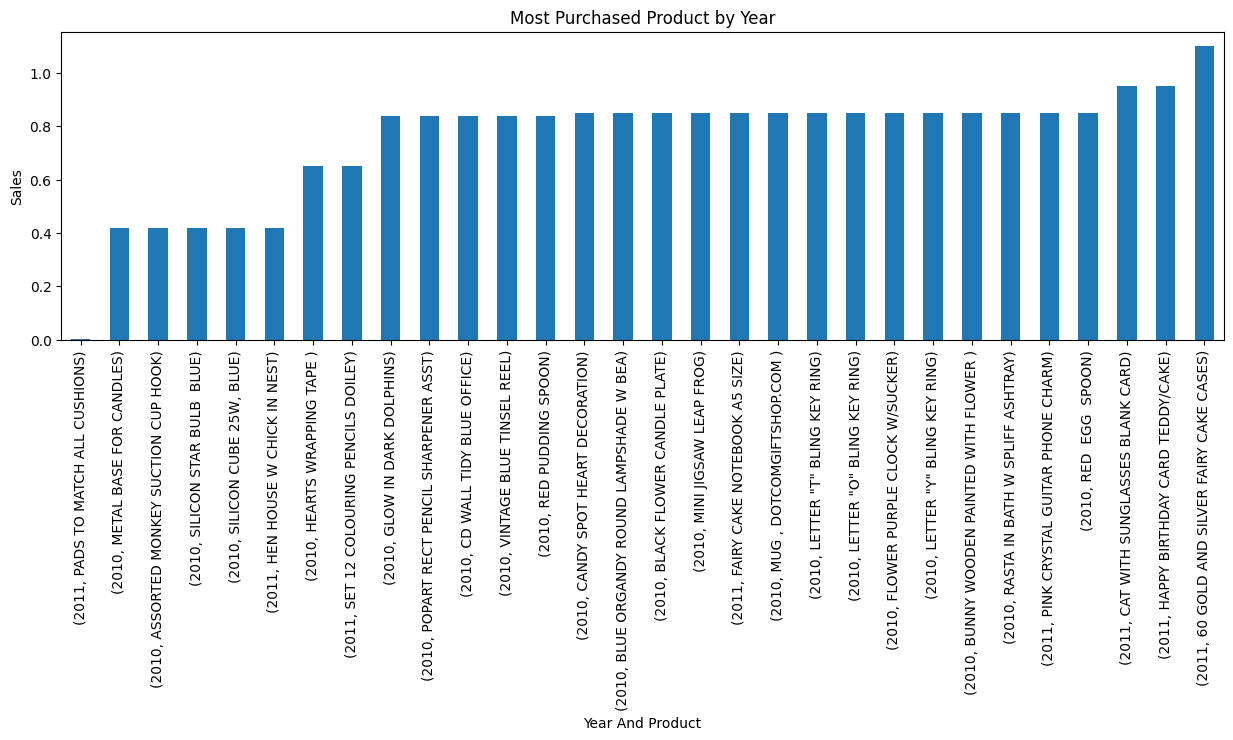

In [24]:
Top_products_by_time.plot(kind='bar',figsize=(15,4))
plt.title("Most Purchased Product by Year")
plt.ylabel('Sales')
plt.xlabel('Year And Product')
plt.show()


Analysis for missing CustomerId (Guest Users)

In [25]:
df['IsGuest']=df['CustomerID'].isnull()

C:\Users\DELL\AppData\Local\Temp\ipykernel_13860\452675219.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['IsGuest']=df['CustomerID'].isnull()


In [26]:
Guest_sales = df[df['IsGuest']==True]
Registered_sales =df[df['IsGuest']==False]


Compare total sales for Guests Vs Registered Users

In [27]:
Total_guest_sales=Guest_sales['Sales'].sum()

In [28]:
Total_registered_sales=Registered_sales['Sales'].sum()
Total_registered_sales

8911407.904